<a href="https://colab.research.google.com/github/Andre-1970/Machine_learning_classical_algorithms_Sem4/blob/main/7_Homework_8_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [95]:
import csv
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_mutual_info_score
import warnings

# Загрузка данных
with open('data/clustering.pkl', 'rb') as f:
    data = pickle.load(f)

X = data['X']

In [96]:
# Обучение модели k-means
kmeans_model = KMeans(n_clusters=4, random_state=42)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kmeans_model.fit(X)

# Вычисление метрики силуэтта
silhouette_metric = silhouette_score(X, kmeans_model.labels_)
print(f"Метрика силуэтта для k=4: {silhouette_metric}")

Метрика силуэтта для k=4: 0.4433754926522356


In [97]:
# Обучение модели k-means с k=2
kmeans_model_2 = KMeans(n_clusters=2, random_state=42)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kmeans_model_2.fit(X)

# Вычисление метрики силуэтта
silhouette_metric_2 = silhouette_score(X, kmeans_model_2.labels_)
print(f"Метрика силуэтта для k=2: {silhouette_metric_2}")

# Можно сделать вывод, что кластеризация на 2 кластера даёт более
# высокое значение метрики силуэтта, чем кластеризация на 4 кластера.
# Сокращение числа кластеров привело к улучшению качества кластеризации.

Метрика силуэтта для k=2: 0.4465356047465253



### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [98]:
# обучение k-means с k=4
kmeans = KMeans(n_clusters=4, random_state=42)
X = data['X']
y_true = data['Y']

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    y_pred = kmeans.fit_predict(X)

# вычисление метрики AMI
ami_score = adjusted_mutual_info_score(data['Y'], y_pred)
print(f"Метрика AMI для k=4: {ami_score}")

Метрика AMI для k=4: 0.5835423055834899


In [99]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        y_pred = kmeans.labels_
        ami = adjusted_mutual_info_score(y_true, y_pred)
        print(f'k={k}, AMI={ami:.3f}')

# Из полученных результатов видно, что максимальное значение метрики AMI достигается при k=3.
# Следовательно, при таком количестве кластеров мы получаем наиболее оптимальное разделение данных на группы.

k=2, AMI=0.929
k=3, AMI=0.614
k=4, AMI=0.584
k=5, AMI=0.536
k=6, AMI=0.492
k=7, AMI=0.482
k=8, AMI=0.452
k=9, AMI=0.436
k=10, AMI=0.410



### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

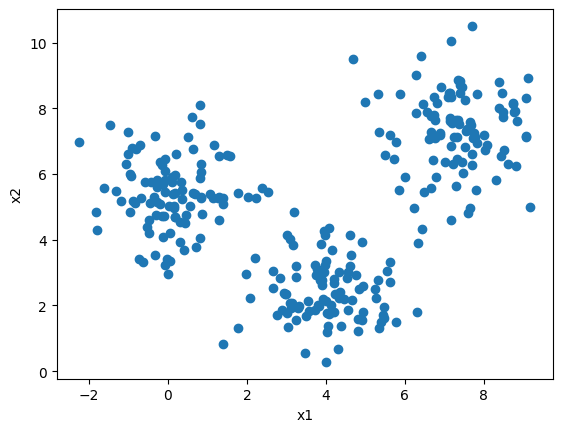

Оптимальное количество кластеров: 3
Точка (5, 8) принадлежит к кластеру: [1]
Точка (0, 5) принадлежит к кластеру: [2]
Они принадлежат к разным кластерам: [ True]
AMI: 0.9700074953683857


In [100]:
# Загрузка данных
data = []
labels = []

with open('data/clustering_hw.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    next(csvreader)  # Пропускаем заголовок столбца
    for row in csvreader:
        data.append([float(row[0]), float(row[1])])
        labels.append(int(row[2]))

data = np.array(data)
labels = np.array(labels)

# Визуализация данных
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Вычисление оптимального количества кластеров k
k_values = range(2, 10)
silhouette_scores = []

with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

optimal_k = k_values[np.argmax(silhouette_scores)]
print("Оптимальное количество кластеров:", optimal_k)

# Обучение k-means с количеством кластеров k
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    kmeans = KMeans(n_clusters=optimal_k, n_init=10)
    kmeans.fit(data)

# К какому кластеру принадлежат точки (5, 8) и (0, 5)?
point1 = np.array([5, 8]).reshape(1, -1)
point2 = np.array([0, 5]).reshape(1, -1)

cluster1 = kmeans.predict(point1)
cluster2 = kmeans.predict(point2)

print("Точка (5, 8) принадлежит к кластеру:", cluster1)
print("Точка (0, 5) принадлежит к кластеру:", cluster2)
print("Они принадлежат к разным кластерам:", cluster1 != cluster2)

# Качество кластеризации по AMI
AMI = adjusted_mutual_info_score(labels, kmeans.labels_)
print("AMI:", AMI)


### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)
